###Universidade Federal do Rio Grande do Norte
IMD0905 - Data Science I

Authors:
* Jhonattan Cabral

* Gustavo Bezerra



This project aims to conduct a study about the number of homicides that occurred in Brazil in the years 2017 and 2018. The data were extracted from the SinespJC and Sinesp Integration solutions, with extraction date of March 14 of this year.



In [0]:
#Adding the data set
import pandas as pd

states_homicide_by_sex = ['ac', 'am', 'ap', 'ba', 'ce', 'df', 'es', 'mg', 'ms', 'pa', 'pb', 'pe', 'pi','pr'
                          , 'rj', 'rn', 'ro', 'rr', 'rs', 'sc', 'se', 'sp']

homicide_by_sex_dataframes = []
for state in states_homicide_by_sex:
  state_homicide = pd.read_csv(state + '---dadospublicos.csv', error_bad_lines=False, delimiter=";") #Esses arquivos contem os dados acerca da quantidade de homicidios de cada estado detalhando o sexo das vitimas (nem todos os estados estao contemplados);
  homicide_by_sex_dataframes.append(state_homicide)
  
total_homicides_of_someStates = ['al', 'go', 'ma', 'mt', 'to']
total_homicides_some_states = []
for state in total_homicides_of_someStates:
  state_homicide = pd.read_csv(state + '---dadospublicos.csv', error_bad_lines=False, delimiter=";") #Esses arquivos contem os dados acerca da quantidade total de homicidios de ALGUNS estados;
  total_homicides_some_states.append(state_homicide)

In [0]:
#Tratamento e junção dos dataframes
import numpy as np

homicide_by_states_total_someStates = pd.concat(total_homicides_some_states)
homicide_by_states_total_someStates.rename(columns={'Mês/Ano':'Data', 'Tipo Crime':'Crime','Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública':'Vitimas'}, 
                 inplace=True)
homicide_by_states_total_someStates=homicide_by_states_total_someStates[~homicide_by_states_total_someStates.Data.str.contains('|'.join(['2015', '2016']), na = False)]
homicide_by_states_total_someStates = homicide_by_states_total_someStates[homicide_by_states_total_someStates.Crime.str.contains(('Homicídio doloso'), na = False)]
homicide_total_by_someStates2017 =homicide_by_states_total_someStates[homicide_by_states_total_someStates.Data.str.contains(('2017'), na = False)]
homicide_total_by_someStates2018 = homicide_by_states_total_someStates[homicide_by_states_total_someStates.Data.str.contains(('2018'), na = False)]

homicide_total_by_someStates2017_withDate = homicide_total_by_someStates2017
homicide_total_by_someStates2018_withDate = homicide_total_by_someStates2018

homicide_total_by_someStates2017 = homicide_total_by_someStates2017.drop(columns=['Data', 'Crime'])
homicide_total_by_someStates2017 = homicide_total_by_someStates2017.groupby('UF').sum().reset_index()

homicide_total_by_someStates2018 = homicide_total_by_someStates2018.drop(columns=['Data', 'Crime'])
homicide_total_by_someStates2018 = homicide_total_by_someStates2018.groupby('UF').sum().reset_index()
#print(homicide_total_by_someStates2018)

#==========================================================================================================#

homicide_by_states = pd.concat(homicide_by_sex_dataframes)
homicide_by_states.rename(columns={'Mês/Ano':'Data',
                          'Sexo da Vítima':'Sexo',
                          'Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública':'Vitimas'}, 
                 inplace=True)

homicide_by_states=homicide_by_states[~homicide_by_states.Data.str.contains('|'.join(['2015', '2016']), na = False)]

homicide_by_states['Vitimas'] = homicide_by_states['Vitimas'].replace({'-': 0, '.': 0})
homicide_by_states['Vitimas'] = homicide_by_states['Vitimas'].astype(np.int64)
homicide_by_states['Vitimas'] = homicide_by_states['Vitimas'].fillna(0)

homicide_by_states2017 = homicide_by_states[homicide_by_states.Data.str.contains(('2017'), na = False)]
homicide_by_states2018 = homicide_by_states[homicide_by_states.Data.str.contains(('2018'), na = False)]

#==========================================================================================================#

#Total de homicidios sofrido por mulheres no ano de 2017 (não contem os dados sobre os seguintes estados: PR, AL, GO, MA, MT, TO)
homicide_female2017 = homicide_by_states2017[homicide_by_states2017.Sexo.str.contains(('Feminino'), na = False)]
homicide_female2017 = homicide_female2017.drop(columns=['Tipo Crime', 'Data', 'Sexo'])
homicide_female2017 = homicide_female2017.groupby('UF').sum().reset_index()
homicide_female2017 =homicide_female2017 [~homicide_female2017.UF.str.contains('Paraná', na = False)].reset_index(drop=True)
#print(homicide_female2017)

#==========================================================================================================#

#Total de homicidios sofrido por mulheres no ano de 2018 (não contem os dados sobre os seguintes estados: PR, AL, GO, MA, MT, TO)
homicide_female2018 = homicide_by_states2018[homicide_by_states2018.Sexo.str.contains(('Feminino'), na = False)]
homicide_female2018 = homicide_female2018.drop(columns=['Tipo Crime', 'Data', 'Sexo'])
homicide_female2018 = homicide_female2018.groupby('UF').sum().reset_index()
homicide_female2018 =homicide_female2018 [~homicide_female2018.UF.str.contains('Paraná', na = False)].reset_index(drop=True)
#print(homicide_female2018)

#==========================================================================================================#

total_homicide_2017_by_states = homicide_by_states2017.drop(columns=['Tipo Crime', 'Data', 'Sexo'])
total_homicide_2017_by_states = total_homicide_2017_by_states.groupby('UF').sum().reset_index()


total_homicide_2018_by_states = homicide_by_states2018.drop(columns=['Tipo Crime', 'Data', 'Sexo'])
total_homicide_2018_by_states = total_homicide_2018_by_states.groupby('UF').sum().reset_index()

#Total homicidios 2017 por estado
total_homicide_2017 = homicide_by_states = pd.concat([total_homicide_2017_by_states, homicide_total_by_someStates2017]).reset_index(drop=True)


#Total homicidios 2018 por estado

total_homicide_2018 = homicide_by_states = pd.concat([total_homicide_2018_by_states, homicide_total_by_someStates2018]).reset_index(drop=True)


total_homicide_2017.sort_values(by=['UF'], inplace=True)

total_homicide_2018.sort_values(by=['UF'], inplace=True)



#print(total_homicide_2018) 

#==========================================================================================================#
#print(total_homicide_2017)
#print(homicide_female2017)
#print(total_homicide_2018)
#print(homicide_female2018)



In [0]:
#Adicionando dados referentes a população, latitude e longitude de cada estado brasileiro
latLongPop = {}

latLongPop['Acre'] = (-8.77, -70.55, 869265)
latLongPop['Alagoas'] = (-9.71, -35.73, 3322820)
latLongPop['Amazonas'] = (-3.07, -61.66, 4080611)
latLongPop['Amapá'] = (1.41, -51.77, 829494)
latLongPop['Bahia'] = (-12.96, -38.51, 14812617)
latLongPop['Ceará'] = (-3.71, -38.54, 9075649)
latLongPop['Distrito Federal'] = (-15.83, -47.86, 2974703)
latLongPop['Espírito Santo'] = (-19.19, -40.34, 3972388)
latLongPop['Goiás'] = (-16.64, -49.31, 6921161)
latLongPop['Maranhão'] = (-2.55, -44.30, 7035055)
latLongPop['Mato Grosso'] = (-12.64, -55.42, 3441998)
latLongPop['Mato Grosso do Sul'] = (-20.51, -54.54, 2748023)
latLongPop['Minas Gerais'] = (-18.10, -44.38, 21040662)
latLongPop['Pará'] = (-5.53, -52.29, 8513497)
latLongPop['Paraíba'] = (-7.06, -35.55, 3996496)
latLongPop['Paraná'] = (-24.89, -51.55, 11348937)
latLongPop['Pernambuco'] = (-8.28, -35.07, 9496294)
latLongPop['Piauí'] = (-8.28, -43.68, 3264531)
latLongPop['Rio de Janeiro'] = (-22.84, -43.15, 17159960)
latLongPop['Rio Grande do Norte'] = (-5.22, -36.52, 3479010)
latLongPop['Rondônia'] = (-11.22, -62.80, 1757589)
latLongPop['Rio Grande do Sul'] = (-30.01, -51.22, 11329605)
latLongPop['Roraima'] = (1.89, -61.22, 576568)
latLongPop['Santa Catarina'] = (-27.33, -49.44, 7075494)
latLongPop['Sergipe'] = (-10.90, -37.07, 2278308)
latLongPop['São Paulo'] = (-23.55, -46.64, 45538936)
latLongPop['Tocantins'] = (-10.25, -48.25, 1555229)

In [0]:
#Atualizando tabelas
#MAPAS DE HOMICIDIOS POR MULHERES FORAM GERADOS PELO KEPLER E PODEM SER ANALISADOS ACESSANDO OS ARQUIVOS <.html>
def dfUpdate(dataF):
  dataF['latitude'] = 0
  dataF['longitude'] = 0
  dataF['population'] = 0
  for state in dataF['UF']:
    dataF.loc[dataF['UF'] == state, ['latitude']] = latLongPop[state][0]
    dataF.loc[dataF['UF'] == state, ['longitude']] = latLongPop[state][1]
    dataF.loc[dataF['UF'] == state, ['population']] = latLongPop[state][2]


dfUpdate(total_homicide_2017)
dfUpdate(total_homicide_2018)
dfUpdate(homicide_female2017)
dfUpdate(homicide_female2018)

#print(total_homicide_2017['Vitimas'].sum())
#print(homicide_female2017['Vitimas'].sum())
#print(total_homicide_2018['Vitimas'].sum())
#print(homicide_female2018['Vitimas'].sum())
#from google.colab import files
#homicide_female2017.to_csv('/content/total_homicide_2018.csv', index=False) 
#files.download('total_homicide_2018.csv')
#print(homicide_female2017)


In [0]:
print(total_homicide_2018)

                     UF  Vitimas  latitude  longitude  population
0                  Acre      236     -8.77     -70.55      869265
22              Alagoas     1332     -9.71     -35.73     3322820
1                 Amapá      289      1.41     -51.77      829494
2              Amazonas     1090     -3.07     -61.66     4080611
3                 Bahia     5517    -12.96     -38.51    14812617
4                 Ceará     4432     -3.71     -38.54     9075649
5      Distrito Federal      528    -15.83     -47.86     2974703
6        Espírito Santo     1106    -19.19     -40.34     3972388
23                Goiás     2011    -16.64     -49.31     6921161
24             Maranhão     1617     -2.55     -44.30     7035055
25          Mato Grosso      916    -12.64     -55.42     3441998
7    Mato Grosso do Sul      437    -20.51     -54.54     2748023
8          Minas Gerais     3049    -18.10     -44.38    21040662
9                Paraná     1955    -24.89     -51.55    11348937
10        

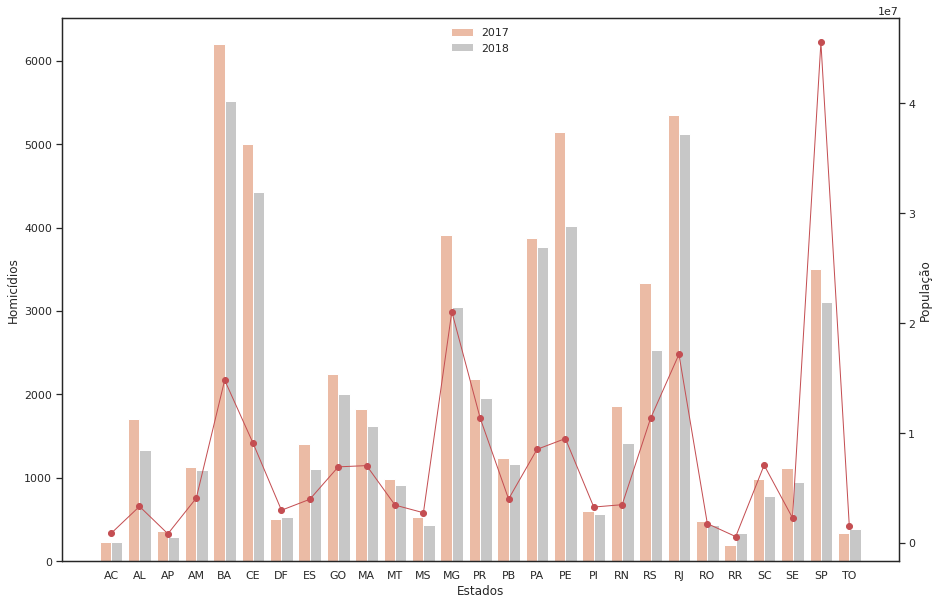

In [11]:
#Plotando gráfico de total de homicidios dolosos no brasil nos anos de 2017 e 2018 por estado
import matplotlib.pyplot as plt
import seaborn as sns

uf = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PR', 'PB', 'PA', 'PE', 'PI', 'RN', 'RS', 'RJ', 'RO', 'RR', 'SC', 'SE', 'SP', 'TO']
total_homicide_2017ToPlot = total_homicide_2017
total_homicide_2017ToPlot['UF'] = uf

total_homicide_2018ToPlot = total_homicide_2018
total_homicide_2018ToPlot['UF'] = uf


#Juntando novamente os dataframes para facilitar a plotagem
total_homicide_2017ToPlot['Ano'] = 2017
total_homicide_2018ToPlot['Ano'] = 2018
total_homicide_toPlot = pd.concat([total_homicide_2017ToPlot, total_homicide_2018ToPlot]).reset_index(drop=True)

#print(total_homicide_toPlot)

sns.set(style="white", rc={"lines.linewidth": 1})

fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
sns.barplot(x="UF", y="Vitimas", hue="Ano", data=total_homicide_toPlot, palette='RdGy', ax=ax1)
ax1.set(ylabel='Homicídios', xlabel='Estados')
ax1.legend(loc='upper center', frameon=False)

#sns.lineplot(x="UF", y="population", data=total_homicide_toPlot, marker="o",ax=ax2, color='r')
ax2.plot(total_homicide_toPlot["UF"].unique(), total_homicide_toPlot["population"].unique(),
        marker="o", color='r')
ax2.set(ylabel='População')

plt.show()
#sns.set()



In [13]:
!pip install folium==0.8.2

     |████████████████████████████████| 92kB 3.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.2 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [0]:
import folium
folium.__version__
import requests
import json

In [15]:
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}

response = requests.get("https://servicodados.ibge.gov.br/api/v1/localidades/estados",
                       headers=headers)
json_data = response.json()

ibge_states = pd.DataFrame.from_dict(json_data)
ibge_states

id  ... sigla
0   11  ...    RO
1   12  ...    AC
2   13  ...    AM
3   14  ...    RR
4   15  ...    PA
5   16  ...    AP
6   17  ...    TO
7   21  ...    MA
8   22  ...    PI
9   23  ...    CE
10  24  ...    RN
11  25  ...    PB
12  26  ...    PE
13  27  ...    AL
14  28  ...    SE
15  29  ...    BA
16  31  ...    MG
17  32  ...    ES
18  33  ...    RJ
19  35  ...    SP
20  41  ...    PR
21  42  ...    SC
22  43  ...    RS
23  50  ...    MS
24  51  ...    MT
25  52  ...    GO
26  53  ...    DF

[27 rows x 4 columns]

In [16]:
# put your code here

response = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/"+
                        "?formato=application/vnd.geo+json&resolucao=2",
                       headers=headers)
data_json = response.json()

m_brazil = folium.Map(
    location=[-31.25, -55],
    zoom_start=4,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(data_json).add_to(m_brazil)

m_brazil

In [19]:
import re
import numpy as np
from branca.colormap import LinearColormap
import branca

def generate_map(dataset, legend):
    response = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/"+
                        "?formato=application/vnd.geo+json&resolucao=2",
                       headers=headers)
    data_json = response.json()

    m_brazil = folium.Map(
        location=[-31.25, -55],
        zoom_start=4,
        tiles='Stamen Terrain'
    )

    # Configure geojson layer
    folium.GeoJson(data_json).add_to(m_brazil)

    states_copy = ibge_states
    states_copy["homicides"] = 0

    states_copy = states_copy.set_index('id')

    for state in data_json['features']:
        codarea = int(state['properties']['codarea'])
        ibge_state = ibge_states[ibge_states['id'] == codarea]
        ibge_state = ibge_state['sigla'].to_string(index=False).strip()
    
        homicides = dataset[dataset['UF'].str.strip() == ibge_state]
        homicides = homicides['Vitimas'].to_string(index=False)
        homicides = re.sub("[^0-9]", "", homicides)
        if homicides == '':
            homicides = 0
        else:
            homicides = int(homicides)
    
        states_copy.loc[codarea, 'homicides'] = homicides
    
        state['properties']['state'] = str(ibge_state)
        state['properties']['homicides'] = str(homicides)

    bins = np.linspace(states_copy.homicides.min(),
                       states_copy.homicides.max(),
                       10).tolist()

    folium.Choropleth(
        geo_data=data_json,
        data=states_copy,
        name= "homicides",
        columns=['sigla', 'homicides'],
        key_on='feature.properties.state',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.5,
        legend_name=legend,
        bins=bins
    ).add_to(m_brazil)

    return m_brazil


m_brazil = generate_map(total_homicide_2017, '#Homicides 2017')
m_brazil.save('brazil_homicide2017.html')
m_brazil






In [20]:
m_brazil = generate_map(total_homicide_2018, '#Homicides 2018')
m_brazil.save('brazil_homicide2018.html')
m_brazil

In [23]:
total_homicides = pd.merge(total_homicide_2017, total_homicide_2018, how='inner',
                          left_on='UF', right_on='UF')
    
total_homicides['Vitimas'] = total_homicides['Vitimas_x'] + total_homicides['Vitimas_y']
total_homicides = total_homicides.drop(["Vitimas_x", "Vitimas_y"], axis=1)

m_brazil = generate_map(total_homicides, '#Homicides 2017 and 2018')
m_brazil.save('brazil_homicide2017_2018.html')
m_brazil